In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score
import joblib
import pandas as pd
import numpy as np

# 回归预测房价

In [2]:
# 获取数据
lb = fetch_california_housing(data_home='data')

print("获取形状")
print(lb.data.shape)
print(type(lb.data))
print(lb.target.shape)
print(type(lb.target))
print('-' * 50)

print("第一个样本的特征值")
print(lb.data[0])
print('-' * 50)

print("前10个样本的目标值")
print(lb.target[0])
print(lb.target[:10])
print("最高最低房价：", np.max(lb.target), np.min(lb.target))
# print(lb.DESCR)
print('-' * 50)

# 特征名称
print(lb.feature_names)


获取形状
(20640, 8)
<class 'numpy.ndarray'>
(20640,)
<class 'numpy.ndarray'>
--------------------------------------------------
第一个样本的特征值
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
--------------------------------------------------
前10个样本的目标值
4.526
[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]
最高最低房价： 5.00001 0.14999
--------------------------------------------------
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


MedInc - 中位收入（Median Income）
HouseAge - 房屋年龄（House Age）
AveRooms - 平均房间数（Average Number of Rooms）
AveBedrms - 平均卧室数（Average Number of Bedrooms）
Population - 人口数量（Population）
AveOccup - 平均居住人数（Average Occupancy）
Latitude - 纬度（Latitude）
Longitude - 经度（Longitude）

In [3]:
# 分割数据集到训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(lb.data, lb.target, test_size=0.25, random_state=1)


In [4]:
# 进行标准化处理、目标值处理
# 特征值和目标值是都必须进行标准化处理, 实例化两个标准化API
std_x = StandardScaler()

x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [5]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15480, 8)
(5160, 8)
(15480,)
(5160,)


In [7]:
# 目标值进行了标准化
std_y = StandardScaler()

# 标签也进行标准化，可以和标签不标准化进行对比，看一下哪个误差比较小
y_train = std_y.fit_transform(y_train.reshape(-1, 1)) # 目标值是一维的，这里需要传进去2维的
y_test = std_y.transform(y_test.reshape(-1, 1))

In [8]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15480, 8)
(5160, 8)
(15480, 1)
(5160, 1)


In [11]:
test1=np.array([1,2,3])
print(test1.reshape(-1,1))
print(test1)

[[1]
 [2]
 [3]]
[1 2 3]


## 1、 正规方程求解

In [12]:
# # estimator预测

lr = LinearRegression()

# fit是耗时的
lr.fit(x_train, y_train)

# 回归系数可以看特征与目标之间的相关性，即每个特征对目标值的影响程度
print('回归系数：\n', lr.coef_)
print("-"*50)

# 预测
y_predict = lr.predict(x_test)

# 预测测试集的房子价格，通过inverse得到真正的房子价格
#y_lr_predict = std_y.inverse_transform(y_predict)

# 保存训练好的模型，模型中保存的是w的值，也保存了模型结构
# 保存模型放在fit之后即可
#joblib.dump(lr, "./tmp/test.pkl")

print("测试集里前10个房子的预测价格：\n", y_predict[0:10])
#print("测试集里前10个房子的预测价格：\n", y_lr_predict[0:10])
print("-"*50)

# 求测试集的损失
print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))

回归系数：
 [[ 0.71942632  0.10518431 -0.23147194  0.26802332 -0.00448136 -0.03495117
  -0.7849086  -0.76307353]]
--------------------------------------------------
测试集里前10个房子的预测价格：
 [[ 0.039975  ]
 [-0.9856667 ]
 [ 0.54595901]
 [-0.31917221]
 [ 0.65037085]
 [ 1.23359413]
 [ 0.81054876]
 [-0.38917515]
 [-0.28938242]
 [-0.05080248]]
--------------------------------------------------
正规方程的均方误差： 0.40082431136214197


### 加载保存的模型

In [31]:
model = joblib.load("./tmp/test.pkl")
# # 因为目标值进行了标准化，一定要把预测后的值逆向转换回来
y_predict = model.predict(x_test)

print(type(model))
print("-"*50)

print("保存的模型预测的结果：\n", y_predict[:10])
print("正规方程的均方误差：\n", mean_squared_error(y_test, y_predict))

# print("正规方程inverse后的均方误差：", mean_squared_error(std_y.inverse_transform(y_test),
#                                                std_y.inverse_transform(y_predict)))

<class 'sklearn.linear_model._base.LinearRegression'>
--------------------------------------------------
保存的模型预测的结果：
 [2.12391852 0.93825754 2.7088455  1.70873764 2.82954754 3.50376456
 3.0147162  1.62781292 1.74317518 2.01897806]
正规方程的均方误差：
 4.798956131502183


In [13]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))

# 人工求均方误差
print((np.square(3 - 2.5) + np.square(0.5) + 1) / 4)


0.375
0.375


## 2、 随机梯度下降

In [39]:
# 梯度下降去进行房价预测,数据量大要用这个
# learning_rate，学习率调整的方式，
# 比如constant、invscaling（默认，随迭代次数减小）、optimal（学习率根据损失函数的二阶导数自动调整）
# eta0，设置learning_rate的初始值
# alpha是正则化力度，通常与 penalty 参数结合使用。当 penalty 设置为 'l2' 时，它实现 L2 正则化，类似于 Ridge；
# 当设置为 'l1' 时，它实现 L1 正则化，类似于 Lasso。alpha 参数的值越大，正则化强度越大.
# max_iter 最大迭代次数
sgd = SGDRegressor(eta0=0.01, penalty='l2',max_iter=1000)

# 训练
sgd.fit(x_train, y_train)

print('梯度下降的回归系数', sgd.coef_)

# 预测测试集的房子价格
# y_sgd_predict = std_y.inverse_transform(sgd.predict(x_test).reshape(-1, 1))
y_predict = sgd.predict(x_test)

# print("梯度下降测试集里面每个房子的预测价格：", y_sgd_predict)
print("梯度下降的均方误差：", mean_squared_error(y_test, y_predict))
# print("梯度下降的原始房价量纲均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_sgd_predict))

梯度下降的回归系数 [ 0.70786432  0.112551   -0.15889175  0.30422911 -0.0122361  -0.0032661
 -0.7980291  -0.76143771]
梯度下降的均方误差： 0.40795678399475427


D:\3.8\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 3、 岭回归
### L2正则化

In [37]:
# 岭回归是对线性回归加入L2正则化，L2正则化是对系数的平方和进行惩罚
# alpha就是补偿的系数
# 正规方程求解，加补偿就可以让正规方程可逆
rd = Ridge(alpha=0.02)

rd.fit(x_train, y_train)

print(rd.coef_) # 回归系数

# 预测测试集的房子价格

# y_rd_predict = std_y.inverse_transform(rd.predict(x_test))
y_predict = rd.predict(x_test)
print(y_predict.shape)
# print("岭回归里面每个房子的预测价格：", y_rd_predict)

print("岭回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("岭回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_rd_predict))

[[ 0.71942576  0.10518585 -0.23146889  0.26801931 -0.00448083 -0.03495127
  -0.78489401 -0.76305881]]
(5160, 1)
岭回归的均方误差： 0.400824186685544


## 4、 Lasso回归
### L1正则化


In [38]:
# alpha就是补偿的系数

ls = Lasso(alpha=0.001)

ls.fit(x_train, y_train)

print(ls.coef_)

# 预测测试集的房子价格
print(ls.predict(x_test).shape)
print('-'*50)
# y_ls_predict = std_y.inverse_transform(ls.predict(x_test).reshape(-1,1))
y_predict = ls.predict(x_test)
# print("Lasso回归里面每个房子的预测价格：", y_rd_predict)

print("Lasso回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("Lasso回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_ls_predict))

[ 0.71431792  0.10613811 -0.21758465  0.25415162 -0.00311065 -0.03403136
 -0.77399969 -0.75154125]
(5160,)
--------------------------------------------------
Lasso回归的均方误差： 0.40081302952916903


# 5、 逻辑回归

训练集有很多个样本（早已贴好标签，y=1或0）。
寻找一个线性方程，Z = XW，其中W是待求参数。
整个逻辑回归要做的就是：y=1的样本尽可能Z>0且越大越好，y=0的样本尽可能Z<0且越小越好。
在空间上，这些样本点就落在了两个区域，方程就像是划分这两个区域的一条线\面

P = sigmoid(Z) = 样本被判为1的概率，当Z越大，P越大，该样本被判为1的概率越大

似然损失函数，L(W) = -Σ[ yi * logPi + (1-yi) * log(1-Pi) ]
当真实值yi=1时，Z越大，pi越大，被判为1的概率越大，损失越小。如果Z<0，则pi<0.5，这时被判为0，同时损失很大，说明分错类了
当真实值yi=0时，Z越小，pi越小，被判为1的概率越小，则判为0的概率越大，损失越小



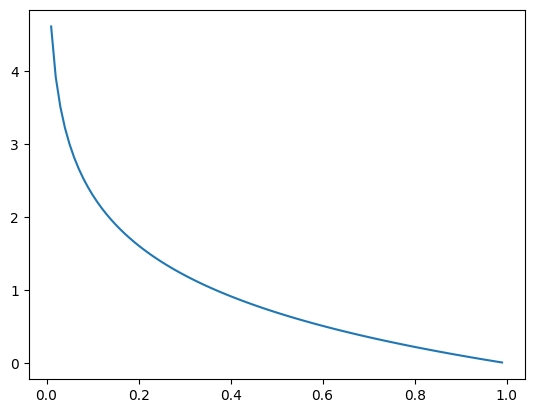

In [3]:
x=np.arange(0.01,1,0.01)
import matplotlib.pyplot as plt
plt.plot(x,-np.log(x))  #以e为底部，
plt.show()

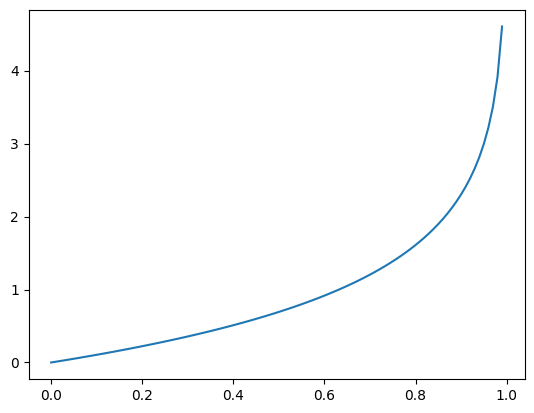

In [4]:
x=np.arange(0,1,0.01)
import matplotlib.pyplot as plt
plt.plot(x,-np.log(1-x))
plt.show()

### 逻辑回归做二分类进行癌症预测（根据细胞的属性特征）

In [3]:
# 构造列标签名字
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
          'Mitoses', 'Class']

# 读取数据
# data = pd.read_csv(
#     "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
#     names=column)
data = pd.read_csv("data/breast-cancer-wisconsin.csv", names=column)

# 当你读取数据时，看上去是数值的列，读进来是字符串，说明里边存在非数值特征
print(data.info())
print("-"*50)

print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
--------------------------------------------------
        Sample code number  Clump Thickness  U

In [4]:
data.shape

(699, 11)

In [5]:
print(data['Bare Nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [6]:
# 缺失值进行处理
data = data.replace(to_replace='?', value=np.nan)
# 直接删除，哪一行有空值，就删除对应的样本
data = data.dropna()

print(data.shape)

(683, 11)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [8]:
# 分类的类别是2和4,对应 "良性", "恶性"
data[column[10]].unique()

array([2, 4], dtype=int64)

In [9]:
# 进行数据的分割,第零列是编号
x_train, x_test, y_train, y_test = train_test_split(data[column[1:10]],
                                                    data[column[10]],
                                                    test_size=0.25, random_state=1)

In [10]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:
# 进行标准化处理
std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)


In [13]:
print(type(x_train))
print(x_train[0])

<class 'numpy.ndarray'>
[-1.21629973 -0.70863282 -0.75174943  0.04301674 -0.55657068 -0.71054972
 -0.99312055 -0.62911518 -0.36280962]


In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 9)
(171, 9)
(512,)
(171,)


In [34]:
# C正则化力度的倒数
# solver = 'liblinear'  solver是学习率优化算法，就是学习率会随着epoch的变化而变化
# epoch就代表第几次迭代
# max_iter 最大迭代次数
lg = LogisticRegression(C=0.5, solver='lbfgs')

# 训练
lg.fit(x_train, y_train)
print(lg.coef_) # 逻辑回归的权重参数，了解，没那么重要
print('-'*50)

y_predict = lg.predict(x_test)
print(y_predict)
print("准确率：", lg.score(x_test, y_test))
print('-'*50)

# 得出对应分类的概率
print(lg.predict_proba(x_test))
print('-'*50)

# 为什么还要看下召回率，labels和target_names对应
# macro avg 平均值  weighted avg 加权平均值
print("精确率召回率：\n", classification_report(y_test, y_predict, labels=[2, 4], target_names=["良性", "恶性"]))
# AUC计算要求是二分类，不需要是0和1
print("AUC指标：", roc_auc_score(y_test, y_predict))

[[1.1133701  0.25198952 0.79297925 0.61016803 0.07140358 1.10923362
  0.77824325 0.64387342 0.67841755]]
--------------------------------------------------
[2 2 2 4 2 4 2 2 4 4 2 2 4 2 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 4 4 2 4 2
 2 4 4 4 2 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 4 2 4 4 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 4 2 4
 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 4 4 2 2 4 2 2 2 2 4
 2 2 2 2 2 4 2 4 2 4 2 2 4 2 4 2 4 4 2 4 2 2 2]
准确率： 0.9824561403508771
--------------------------------------------------
[[9.49055860e-01 5.09441403e-02]
 [9.94951356e-01 5.04864403e-03]
 [9.83692948e-01 1.63070522e-02]
 [2.69465805e-02 9.73053420e-01]
 [9.97326877e-01 2.67312287e-03]
 [7.07379938e-04 9.99292620e-01]
 [9.91945714e-01 8.05428616e-03]
 [9.92204547e-01 7.79545284e-03]
 [7.10879193e-04 9.99289121e-01]
 [6.55499402e-04 9.99344501e-01]
 [9.87584036e-01 1.24159640e-02]
 [9.96201488e-01 3.79851191e-03]
 [1.32714502e-03 9.986728